<a href="https://colab.research.google.com/github/CJ-Kaufman/INDE577_2024/blob/main/Supervised_Learning/Boosting/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ensemble Boosting Implementation

#Introduction

Boosting is an ensemble learning technique used to improve the accuracy of machine learning models by combining multiple weak learners (models that perform slightly better than random guessing) to create a strong learner. Unlike bagging, where multiple models are trained independently, boosting focuses on training models sequentially. Each new model is trained to correct the errors made by the previous ones, with more weight given to misclassified data points. This iterative approach helps to reduce bias and variance, often resulting in significantly improved performance, especially in classification tasks.

Common boosting algorithms include **AdaBoost** and **Gradient Boosting**, which both approach optimizing model performance uniquely. While boosting can lead to highly accurate predictions, it is also sensitive to noisy data and can easily overfit if not properly tuned.

## Adaboost

This training algorithm starts with a base classifier to make predictions on a training set. Once that model yeilds some errors, those error points are given extra weight in the following model in an attempt to correct them. This "boosts" their importance in the model and, idealy, trains it to be more accurate over multiple iterations.

## Imports and Data Loading

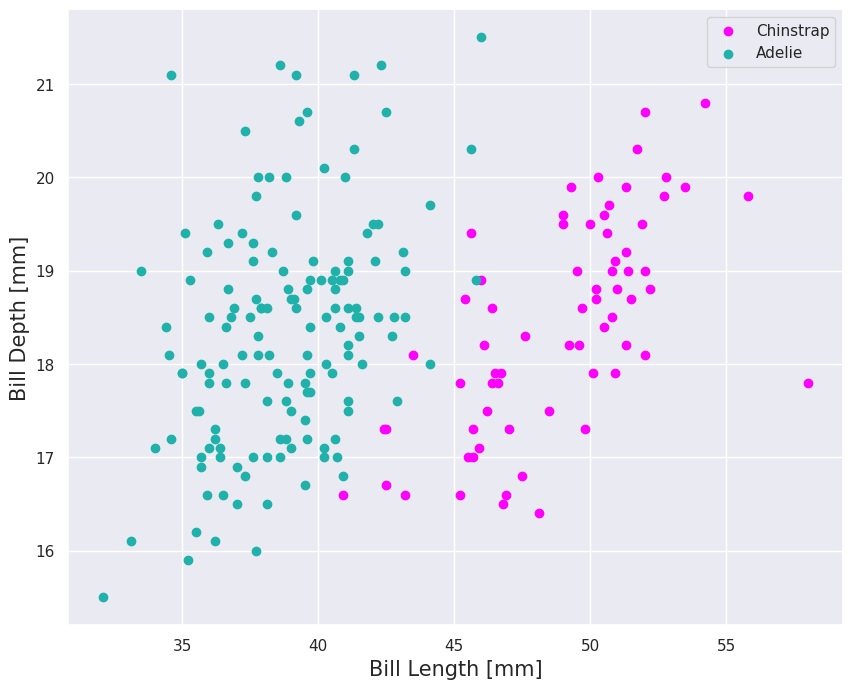

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()  # Remove rows with missing values

# Select only Adelie and Gentoo species
penguins = penguins[penguins['species'].isin(['Chinstrap', 'Adelie'])]

# Extract features for plotting
X = penguins[["bill_length_mm", "bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    else:
        return 1

# Create target value array
y = penguins["species"].map(make_labels).to_numpy()

# Plot the data
species = ["Chinstrap", "Adelie"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize=(10, 8))
for species_name, color in zip(species, colors):
    temp_df = penguins[penguins.species == species_name]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c=color,
               label=species_name)

ax.set_xlabel("Bill Length [mm]", fontsize=15)
ax.set_ylabel("Bill Depth [mm]", fontsize=15)
ax.legend()
plt.show()

## Splitting the data, training and evaluating the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 42)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.96      1.00      0.98        26

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86
 



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Strong results! This has an f-1 score of 0.99, which is better than the other ensemble methods started out in the Random Forests directory of this github.

## Visualizing the Model and Comparing

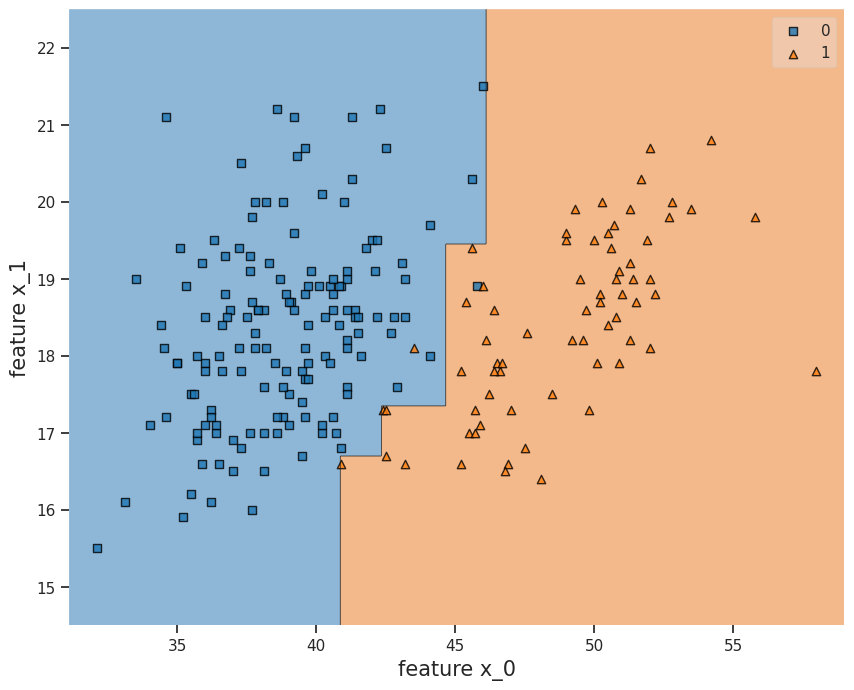

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [ ]:
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")


Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.96      1.00      0.98        26

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86
 



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Gradient Boosting

**Gradient Boosting** is a boosting method where predictors are added sequentially, each correcting the errors of the previous one. Unlike AdaBoost, which focuses on misclassified instances, gradient boosting fits each new predictor to the residual errors of the prior model.

For instance, starting with a regression tree `tree_reg1`, it predicts values $\hat{y}_1$. The error is calculated as:

$$
error_1 = y - \hat{y}_1
$$

Next, a second regression tree `tree_reg2` is trained to predict the residuals $error_1$, updating the predictions to:

$$
y = \hat{y}_1 + \hat{y}_2 + error_2
$$

Here, $error_2$ is smaller than $error_1$, meaning the combined model (sum of predictions from `tree_reg1` and `tree_reg2`) is more accurate.

In the following cells, we will generate artificial cubic data and apply gradient boosting using three regression trees.

### Generate and View Data

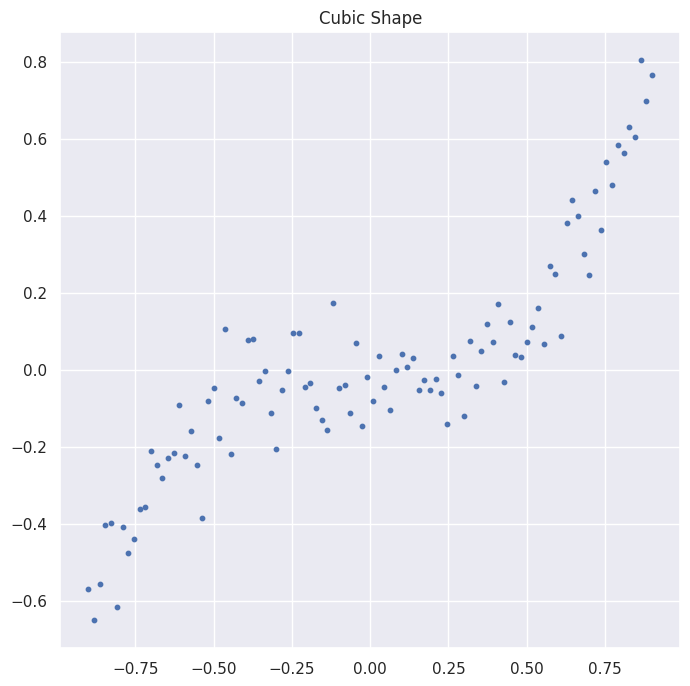

In [ ]:
np.random.seed(0)
X = np.linspace(-0.9, 0.9, 100)
y_cubic = X**3 + np.random.normal(0, 0.09, 100)

plt.figure(figsize=(8, 8))
plt.scatter(X, y_cubic, s=10)
plt.title('Cubic Shape')
plt.show()

### Train the Models
This code trains three decision tree regressors sequentially, where each subsequent tree is trained to predict the residual errors from the previous one, forming the basis for a gradient boosting approach.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_new = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                    y_cubic,
                                                    test_size = 0.4,
                                                    random_state = 42)


tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train, y_train)

y2 = y_train - tree_reg1.predict(X_train)

tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_train, y2)

y3 = y2 - tree_reg2.predict(X_train)

tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
# Optional hard coded final prediction
# y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

### Visualize the Models

Aside from a dip around -0.5, these plots indicate our models generally improving each time.

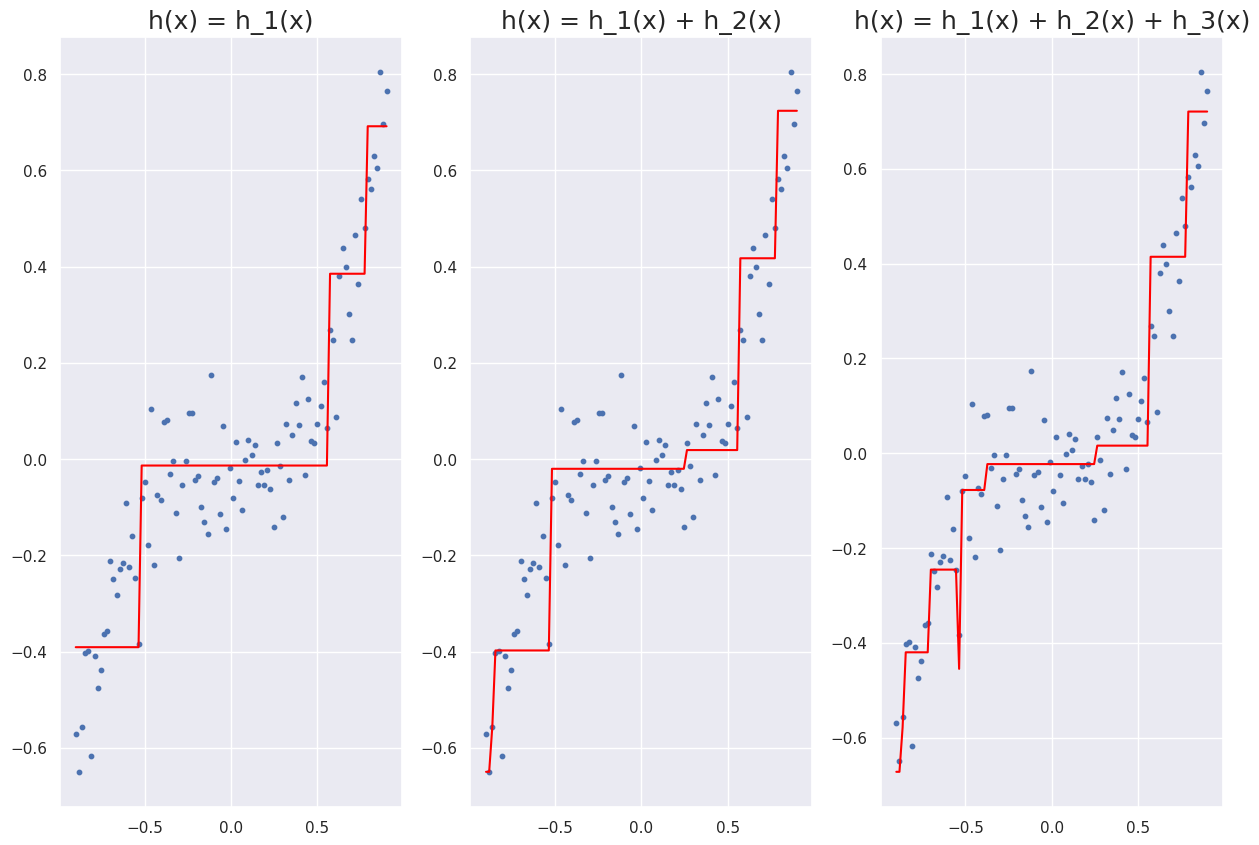

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.scatter(X, y_cubic, s=10)
ax1.plot(X, tree_reg1.predict(X_new), color = "red")
ax1.set_title("h(x) = h_1(x)", fontsize = 18)

ax2.scatter(X, y_cubic, s=10)
ax2.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new), color = "red")
ax2.set_title("h(x) = h_1(x) + h_2(x)", fontsize = 18)

ax3.scatter(X, y_cubic, s=10)
ax3.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new)+tree_reg3.predict(X_new), color = "red")
ax3.set_title("h(x) = h_1(x) + h_2(x) + h_3(x)", fontsize = 18)
plt.show()

The following code trains a GradientBoostingRegressor on the training data, makes predictions on the test data, sorts the results by the input values, and visualizes the true vs. predicted values using a scatter plot and a regression line.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth = 2, n_estimators = 150, learning_rate=0.2, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_new)

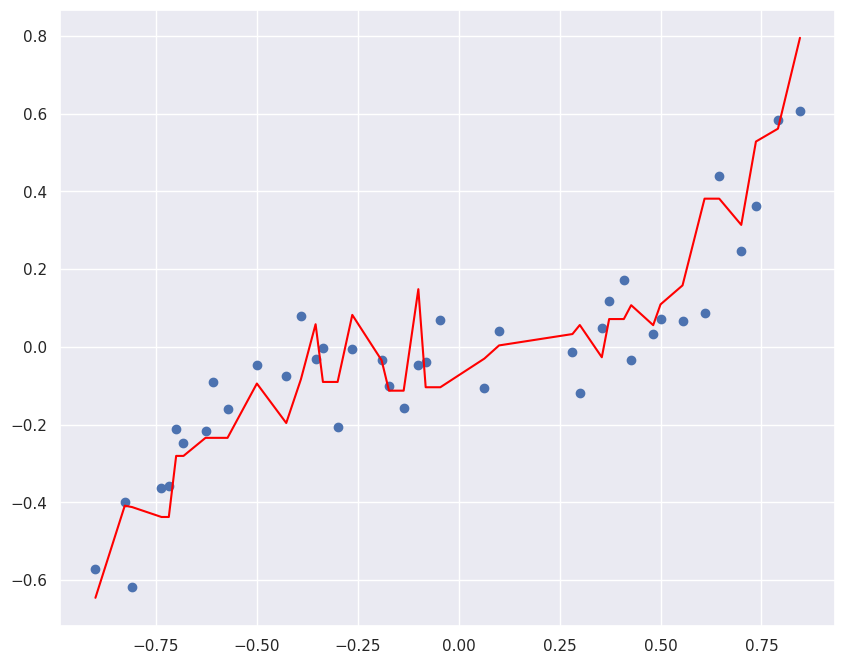

In [ ]:

y_pred = gb_reg.predict(X_test)
points = [(x[0], y, z) for x, y, z in zip(X_test, y_pred, y_test)]
points.sort(key = lambda x : x[0])
X_new_test, y_new_pred, y_new_test = np.array([x[0] for x in points]), np.array([x[1] for x in points]), np.array([x[2] for x in points])
X_new_test = X_new_test.reshape(-1, 1)


plt.figure(figsize=(10, 8))
plt.scatter(X_new_test, y_new_test)
plt.plot(X_new_test, y_new_pred, color = "red")
plt.show()

While the red line (our prediction) does not exactly hit the real data (blue points), it does clearly follow the general pattern of the data. This could be useful for applications where knowing the range of a value is more important than an exact value.